In [2]:
import os
os.getcwd()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import twitter
import json
from urllib.parse import unquote
from collections import Counter
from prettytable import PrettyTable

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
consumer_key = "[your_consumer_key]"
consumer_secret = "[your_consumer_secret]"
access_token = "[access_token]"
access_token_secret = "[access_token_secret]"

auth = twitter.oauth.OAuth(access_token, access_token_secret,
                          consumer_key, consumer_secret)

twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

In [3]:
q = 'dyson+vacuum'

count = 100

lang = 'en'

search_results = twitter_api.search.tweets(q=q, since='2019-10-01', count=count, lang=lang)

statuses =search_results['statuses']

for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e:
        break
    
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
    print(json.dumps(statuses[0], indent=1))

Length of statuses 100
{
 "created_at": "Mon Dec 02 09:39:53 +0000 2019",
 "id": 1201435811302006784,
 "id_str": "1201435811302006784",
 "text": "Cyber Monday: Save $201 on Dyson V11 Cordless\u00a0Vacuum https://t.co/9AobmKTVFf https://t.co/vaFl8uAMXp",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/9AobmKTVFf",
    "expanded_url": "https://360ng.com.ng/cyber-monday-save-201-on-dyson-v11-cordless-vacuum/",
    "display_url": "360ng.com.ng/cyber-monday-s\u2026",
    "indices": [
     53,
     76
    ]
   }
  ],
  "media": [
   {
    "id": 1201435809859153920,
    "id_str": "1201435809859153920",
    "indices": [
     77,
     100
    ],
    "media_url": "http://pbs.twimg.com/media/EKxbgOsWsAARh68.jpg",
    "media_url_https": "https://pbs.twimg.com/media/EKxbgOsWsAARh68.jpg",
    "url": "https://t.co/vaFl8uAMXp",
    "display_url": "pic.twitter.com/vaFl8uAMXp",
    "expanded_url": "https://twitter.co

{
 "created_at": "Mon Dec 02 09:39:53 +0000 2019",
 "id": 1201435811302006784,
 "id_str": "1201435811302006784",
 "text": "Cyber Monday: Save $201 on Dyson V11 Cordless\u00a0Vacuum https://t.co/9AobmKTVFf https://t.co/vaFl8uAMXp",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/9AobmKTVFf",
    "expanded_url": "https://360ng.com.ng/cyber-monday-save-201-on-dyson-v11-cordless-vacuum/",
    "display_url": "360ng.com.ng/cyber-monday-s\u2026",
    "indices": [
     53,
     76
    ]
   }
  ],
  "media": [
   {
    "id": 1201435809859153920,
    "id_str": "1201435809859153920",
    "indices": [
     77,
     100
    ],
    "media_url": "http://pbs.twimg.com/media/EKxbgOsWsAARh68.jpg",
    "media_url_https": "https://pbs.twimg.com/media/EKxbgOsWsAARh68.jpg",
    "url": "https://t.co/vaFl8uAMXp",
    "display_url": "pic.twitter.com/vaFl8uAMXp",
    "expanded_url": "https://twitter.com/360NG2/status/1201435

{
 "created_at": "Mon Dec 02 09:39:53 +0000 2019",
 "id": 1201435811302006784,
 "id_str": "1201435811302006784",
 "text": "Cyber Monday: Save $201 on Dyson V11 Cordless\u00a0Vacuum https://t.co/9AobmKTVFf https://t.co/vaFl8uAMXp",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [],
  "urls": [
   {
    "url": "https://t.co/9AobmKTVFf",
    "expanded_url": "https://360ng.com.ng/cyber-monday-save-201-on-dyson-v11-cordless-vacuum/",
    "display_url": "360ng.com.ng/cyber-monday-s\u2026",
    "indices": [
     53,
     76
    ]
   }
  ],
  "media": [
   {
    "id": 1201435809859153920,
    "id_str": "1201435809859153920",
    "indices": [
     77,
     100
    ],
    "media_url": "http://pbs.twimg.com/media/EKxbgOsWsAARh68.jpg",
    "media_url_https": "https://pbs.twimg.com/media/EKxbgOsWsAARh68.jpg",
    "url": "https://t.co/vaFl8uAMXp",
    "display_url": "pic.twitter.com/vaFl8uAMXp",
    "expanded_url": "https://twitter.com/360NG2/status/1201435

In [4]:
status_texts = [ status['text']
                  for status in statuses ]

screen_names = [ user_mention['screen_name']
                  for status in statuses
                    for user_mention in status['entities']['user_mentions'] ]
hashtags = [ hashtag['text']
              for status in statuses
                for hashtag in status['entities']['hashtags'] ]
words = [ w
           for t in status_texts
            for w in t.split()]

print (json.dumps(status_texts[:5], indent=1))
print (json.dumps(screen_names[:5], indent=1))
print (json.dumps(hashtags[:5], indent=1))
print (json.dumps(words[:5], indent=1))

[
 "Cyber Monday: Save $201 on Dyson V11 Cordless\u00a0Vacuum https://t.co/9AobmKTVFf https://t.co/vaFl8uAMXp",
 "Cyber Monday: Save $201 on Dyson V11 Cordless\u00a0Vacuum https://t.co/xlv95PLsFE https://t.co/GAehPCIYxu",
 "Top Dyson Vacuum Cyber Monday 2019 Deals: All The Best Deals on V6, V7, V8 &amp; V10 Animal &amp; Absolute Cordless Vacs Ro\u2026 https://t.co/FWXGFunDvT",
 "Top Dyson Vacuum Cyber Monday 2019 Deals: All The Best Deals on V6, V7, V8 &amp; V10 Animal &amp; Absolute Cordless Vacs Ro\u2026 https://t.co/pG2qLLp1dd",
 "@Bald2Ricardo Shave in a vacuum.....preferably a Dyson\ud83d\ude01"
]
[
 "Bald2Ricardo",
 "eorlins",
 "amazon",
 "eorlins",
 "eorlins"
]
[
 "Save",
 "news",
 "geek",
 "deals",
 "BlackFiday"
]
[
 "Cyber",
 "Monday:",
 "Save",
 "$201",
 "on"
]


In [5]:
words = [word.lower() for word in words]
hashtags = [word.lower() for word in hashtags]

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:15])

[('vacuum', 442), ('dyson', 422), ('a', 233), ('for', 167), ('i', 155), ('the', 137), ('black', 131), ('friday', 122), ('and', 107), ('cordless', 97), ('best', 97), ('is', 97), ('my', 77), ('this', 75), ('to', 69)]
[('Dyson', 35), ('amazon', 6), ('Kohls', 5), ('eorlins', 3), ('elizagnnnn', 2), ('slideme', 2), ('ArgosHelpers', 2), ('AskDyson', 2), ('WDWords', 2), ('SquigglyRick', 2), ('grav3yardgirl', 2), ('fermalife', 2), ('Bald2Ricardo', 1), ('OfficialRezz', 1), ('jessmmclaren', 1)]
[('dyson', 11), ('blackfriday', 8), ('save', 7), ('deals', 7), ('tech', 7), ('kohlsblackfriday', 5), ('sweepstakes', 5), ('news', 4), ('geek', 4), ('adulting', 3), ('blackfridaysale', 2), ('vacuums', 2), ('vacuumsfloorcare', 2), ('absolute', 2), ('amazon', 2)]


In [6]:
for label, data in (('Word', words),
                     ('Screen Name', screen_names),
                     ('Hashtags', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:15] ]
    pt.align[label], pt.align['Count'] = '1', 'r'
    print(pt)

+----------+-------+
|   Word   | Count |
+----------+-------+
|  vacuum  |   442 |
|  dyson   |   422 |
|    a     |   233 |
|   for    |   167 |
|    i     |   155 |
|   the    |   137 |
|  black   |   131 |
|  friday  |   122 |
|   and    |   107 |
| cordless |    97 |
|   best   |    97 |
|    is    |    97 |
|    my    |    77 |
|   this   |    75 |
|    to    |    69 |
+----------+-------+
+---------------+-------+
|  Screen Name  | Count |
+---------------+-------+
|     Dyson     |    35 |
|     amazon    |     6 |
|     Kohls     |     5 |
|    eorlins    |     3 |
|   elizagnnnn  |     2 |
|    slideme    |     2 |
|  ArgosHelpers |     2 |
|    AskDyson   |     2 |
|    WDWords    |     2 |
|  SquigglyRick |     2 |
| grav3yardgirl |     2 |
|   fermalife   |     2 |
|  Bald2Ricardo |     1 |
|  OfficialRezz |     1 |
|  jessmmclaren |     1 |
+---------------+-------+
+------------------+-------+
|     Hashtags     | Count |
+------------------+-------+
|      dyson       |

In [7]:
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words))
print (lexical_diversity(screen_names))
print (lexical_diversity(hashtags))
print (average_words(status_texts))

0.2774466240381489
0.7005649717514124
0.46218487394957986
15.908620689655173


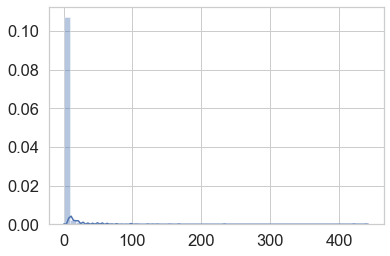

In [8]:
word_counts = sorted(Counter(words).values(), reverse=True)
sns.distplot(word_counts)

Text(0.5, 0, 'Word Rank')

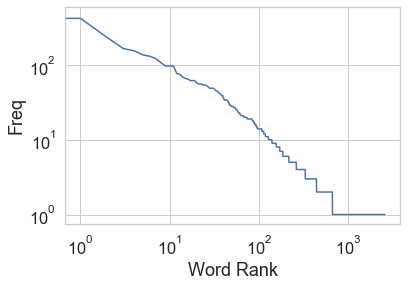

In [9]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

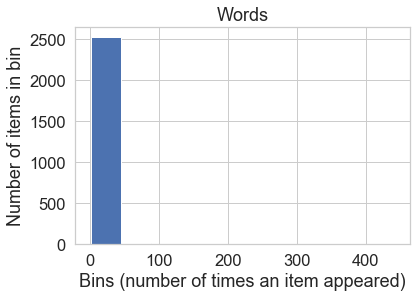

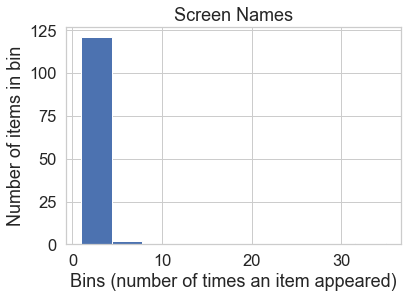

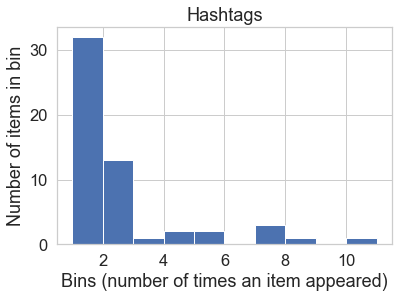

<Figure size 432x288 with 0 Axes>

In [10]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    c = Counter(data)
    plt.hist(c.values())
    
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()

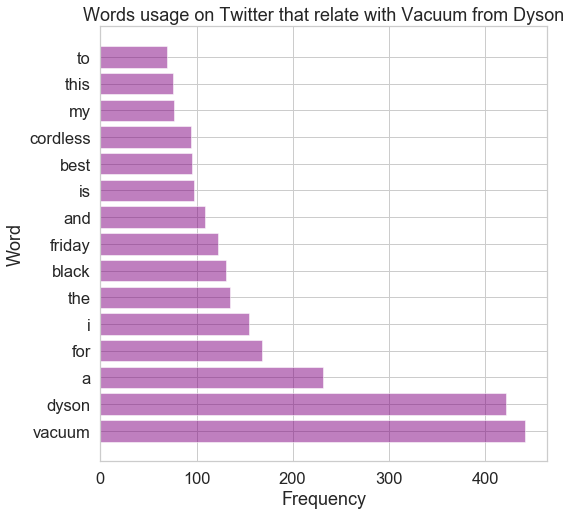

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

top_15_words = ('vacuum', 'dyson', 'a', 'for', 'i', 'the','black','friday','and','is','best','cordless','my','this','to')
y_pos = np.arange(len(top_15_words))
performance = [442,422,231,168,155,135,131,122,109,97,95,94,77,76,69]

plt.barh(y_pos, performance, align='center', alpha=0.5, color="purple")
plt.yticks(y_pos, top_15_words)
plt.ylabel('Word')
plt.xlabel('Frequency')
plt.title('Words usage on Twitter that relate with Vacuum from Dyson')

plt.show()

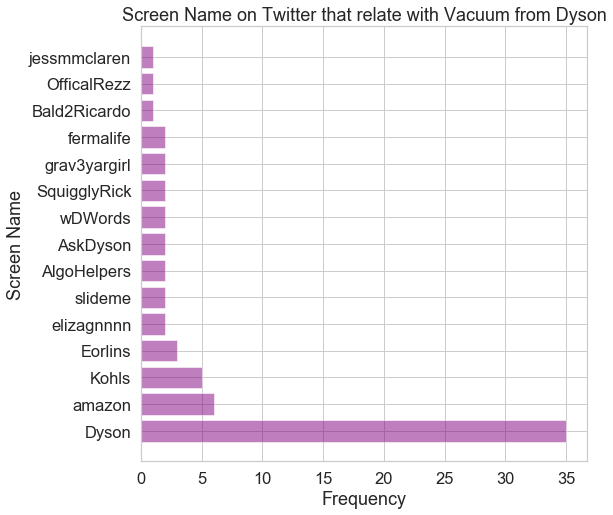

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

top_15_words = ('Dyson', 'amazon', 'Kohls', 'Eorlins', 'elizagnnnn', 'slideme','AlgoHelpers','AskDyson','wDWords','SquigglyRick',
                'grav3yargirl','fermalife','Bald2Ricardo','OfficalRezz','jessmmclaren')
y_pos = np.arange(len(top_15_words))
performance = [35,6,5,3,2,2,2,2,2,2,2,2,1,1,1]

plt.barh(y_pos, performance, align='center', alpha=0.5, color="purple")
plt.yticks(y_pos, top_15_words)
plt.ylabel('Screen Name')
plt.xlabel('Frequency')
plt.title('Screen Name on Twitter that relate with Vacuum from Dyson')

plt.show()

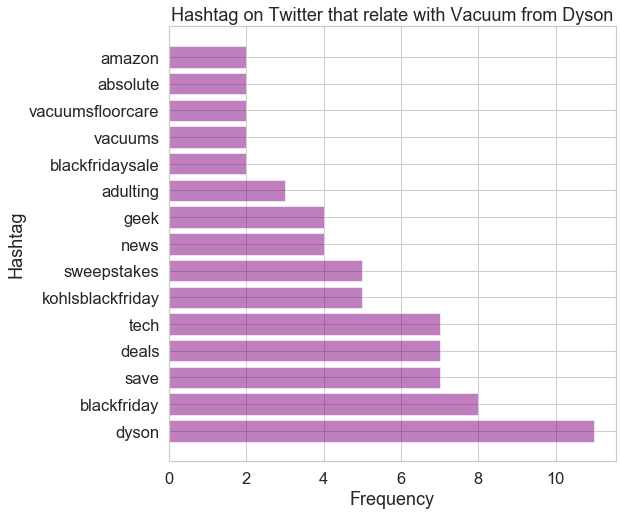

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

top_15_words = ('dyson', 'blackfriday', 'save', 'deals', 'tech', 'kohlsblackfriday','sweepstakes','news','geek','adulting',
                'blackfridaysale','vacuums','vacuumsfloorcare','absolute','amazon')
y_pos = np.arange(len(top_15_words))
performance = [11,8,7,7,7,5,5,4,4,3,2,2,2,2,2]

plt.barh(y_pos, performance, align='center', alpha=0.5, color="purple")
plt.yticks(y_pos, top_15_words)
plt.ylabel('Hashtag')
plt.xlabel('Frequency')
plt.title('Hashtag on Twitter that relate with Vacuum from Dyson')

plt.show()